##### INSTALLED

In [2]:
# pip install --upgrade google-cloud-vision

In [3]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


# google cloud SDK
import io
import os

# Imports the Google Cloud client library
from google.cloud import vision
from google.cloud.vision import types

In [4]:
# Code Reference From: https://github.com/googleapis/google-cloud-python/issues/5349
# need this in order to access API - enter your JSON file in the path after you have created your service account

from google.oauth2 import service_account
credentials = service_account.Credentials. from_service_account_file("./Vision-API/flood-car-classifier-3de49495f20b.json")

# DETECT LABELS
- Function scans photo and returns 10 words to best describe the picture
- I think we should use this first in order to identify water in picture

In [5]:
# formula inspired by https://cloud.google.com/vision/docs/labels

def image_labeler(file_list, string__no_flood_OR_flood):
    
    # Create dictionary for image filename & image labels
    image_dict = {}
    
    for file in file_list:
    
        # Instantiates a client
        client = vision.ImageAnnotatorClient(credentials=credentials)

        # The name of the image file to annotate
        file_name = os.path.abspath('./Vision-API/images/' + string__no_flood_OR_flood + '/' + file)

        # Loads the image into memory
        with io.open(file_name, 'rb') as image_file:
            content = image_file.read()

        image = types.Image(content=content)

        # Performs label detection on the image file
        response = client.label_detection(image=image)
        labels = response.label_annotations
        
        # Create list of image labels
        image_list = []
        
        # Loop through each images assigned labels
        for label in labels:
            image_list.append(label.description)
        
        # Add image filename & labels to dictionary
        image_dict[string__no_flood_OR_flood+file] = image_list
        
    return image_dict

In [6]:
# a list of all of my picture filenames that have floods & cars
flood_list = ['flooded_sedan_416.jpg', 'flooded_sedan_415.jpg', 'flooded_sedan_414.jpg', 'flooded_sedan_413.jpg', 'flooded_sedan_412.jpg', 'flooded_sedan_411.jpg', 'flooded_sedan_410.jpg', 'flooded_sedan_409.jpg', 'flooded_sedan_408.jpg', 'flooded_sedan_407.jpg', 'flooded_sedan_406.jpg', 'flooded_sedan_405.jpg', 'flooded_sedan_404.jpg', 'flooded_tractor.jpg', 'flooded_sedan_403.jpg', 'flooded_sedan_402.jpg', 'flooded_sedan_401.jpg', '15 copy.jpg', '15.jpg', '1 copy.jpg', '1.jpg', '20 copy.jpg', '20.jpg', '2 copy.jpg', '2.jpg', '6 copy.jpg', '6.jpg', '4 copy.jpg', '4.jpg', '19 copy.jpg', '12 copy.jpg', '10 copy.jpg', '16 copy.jpg', '11 copy.jpg', '14 copy.jpg', '13 copy.jpg', '13.jpg', '8 copy.jpg', '8.jpg', '7 copy.jpg', '7.jpg', '3 copy.jpg', '3.jpg', '5 copy.jpg', '5.jpg', '18 copy.jpg', '9 copy.jpg', '9.jpg', '17 copy.jpg', 'Clipart.jpg', '21.jpg', '20.webp', '19.jpg', '18.jpg', '17.jpg', '16.jpg', '15.webp', '14.jpg', '13.webp', '12.jpg', '11.jpg', '10.jpg', '09.jpg', '08.jpg', '07.jpg', '06.jpg', '05.webp', '04.jpg', '03.webp', '02.png', '01.jpg', '497c28b7-9de4-48c3-ab73-5ba579d5e13e-large16x9_GettyImages487453079.jpg', '54caa23cc1ba2_-_nashvillefloodcars_300_0510-de.jpg', '76BRZDX2EKEJ32IFXGKK3DB4XU.jpg', '59b206da4c99a.image.jpg', 'Does-Car-Insurance-Portect-You-From-Flood-Damage-1200x675.jpg', 'side-3.jpg', 'GCFlood18.jpg', '7165F7EC-8D59-4424-AF2D-6071597C63E4.jpg', '1390626.jpg', 'louisianatruckflood.jpg', '160421_wfaa_flood_truck2_33x16_992.jpg', 'IMG_5237_3_t800.jpg', 'images.jpg', 'Mercedes_3.jpg', 'Ferrari.jpg', 'RollsRoyce_Phantom_2.jpeg', 'RollsRoyce_Ph_2.jpg', 'BMW_328i.jpg', 'Porsche_911.jpg', 'Porsche_911_2.jpeg', 'BMW_X6.jpg', 'Ferrari_2.jpeg', 'Ferrari_3.jpeg', 'BMW_X5.jpeg', 'BMW_328i_2.jpg', 'BMW_3series_2.jpeg', 'BMW_3series.jpeg', 'BMW.jpeg', 'BMW_528i.jpeg', 'BMW_330i.jpeg', 'Maserati_SUV_1.jpeg', 'Maserati_Sedan.jpeg', 'Maserati_Levania.jpeg', 'Maserati_SUV.jpeg', 'arizona1.png', 'pickup-truck-driving-through-flooded-street-while-boy-rides-bicycle-BNK7Y1.jpg', 'Maserati_1.jpeg', '160817142356-05-la-flooding-0816-super-169.jpg', 'Maserati_Coupe.jpeg', 'APTOPIX-East-Coast-Rainstorm-South-Carolina7-1880x1162.jpg', 'Flooded-Pick-UpTruck.jpg', '6a00d83451b3c669e2017d3dec28b0970c.jpg', 'maxresdefault.jpg', 'Mercedes_2.jpeg', 'Mercedes_1.jpeg', 'Mercedes_4.jpeg', 'RollsRoyce_Phantom.jpeg', 'Lamborghini.png', 'Lamborghini.jpeg', 'Lamborghini_waldo.jpeg']

In [7]:
# a list of all of my picture filenames that have cars (no floods)
no_flood_list = ['1 copy.jpg', '01.jpg', '2 copy.jpg', '02.jpg', '3 copy.jpg', '03.jpg', '4 copy.jpg', '04.jpg', '4x4-pickup-trucks-parked-in-driveway-in-snow-covered-residential-street-D1M9GM.jpg', '5 copy.jpg', '05.jpg', '6 copy.jpg', '06.webp', '7 copy.jpg', '07.jpg', '8 copy.jpg', '08.jpg', '9 copy.jpg', '09.jpg', '10 copy.jpg', '10.jpg', '11 copy.jpg', '11.jpg', '12 copy.jpg', '12.jpg', '13 copy.jpg', '13.jpg', '14 copy.jpg', '14.jpg', '15 copy.jpg', '15.jpg', '16 copy.jpg', '16.jpg', '17 copy.jpg', '17.jpg', '18 copy.jpg', '18.jpg', '19 copy.jpg', '19.jpg', '20 copy.jpg', '20.jpg', '4102-063348419d0f5ac7ee1ba959fe296ed2.jpg', '3357554727_53f03e4c35_o.jpg', 'avc6z247vog31.jpg', 'BMW_328i.jpg', 'BMW_528i_2.jpg', 'BMW_528i.jpg', 'BMW_X3.png', 'BMW_X5.jpg', 'BMW_X6.jpg', 'Chevrolet-Silverado-ext-680x456.jpg', 'do.jpg', 'DSC_6738.jpg', 'efc70fcba67476ef5608a83aa17ba813.jpg', 'ewscripps.brightspotcdn.png', 'Ferrari_2.jpeg', 'Ferrari.jpeg', 'Ford-Truck-1.jpg', 'i491447.jpg', 'images copy.jpg', 'images.jpg', 'IMG_0361.jpg', 'IMG_0372.jpg', 'IMG_1603.jpg', 'iodiqe1zkpa51.jpg', 'james_duff_ford_ranger_dana_44_swap-13.jpg', 'Lamborghini_3.jpg', 'Lamborghini_23.jpg', 'Lamborghini.jpg', 'Maserati_2.jpg', 'Maserati_3.jpeg', 'Maserati_Leavnte.jpg', 'Maserati.jpeg', 'Mercedes_CLA.jpg', 'Mercedes_E_class.jpg', 'Mercedes_Sedan.png', 'Mercedes.png', 'parms-after-the-storm-2-1024x768.jpg', 'Porsche_911_2.jpg', 'Porsche_911_3.jpg', 'Porsche_911_4.png', 'Porsche_911.jpg', 'RollsRoycePhantom.jpg', 'RollsRoycePhantom2.jpg', 'RollsRoycePhantom3.jpg', 'RollsRoycePhantom4.jpg', 'RollsRoycePhantom5.jpg', 'sedan_401.jpg', 'sedan_402.jpg', 'sedan_403.jpg', 'sedan_404.jpg', 'sedan_405.jpg', 'sedan_406.jpg', 'sedan_407.jpg', 'sedan_408.jpg', 'sedan_409.jpg', 'sedan_410.jpg', 'sedan_411.jpg', 'sedan_412.jpg', 'sedan_413.jpg', 'sedan_414.jpg', 'sedan_415.jpg', 'sedan_416.jpg', 'unnamed-1.jpg', 'unnamed-2.jpg', 'unnamed-3.jpg', 'unnamed.jpg']

In [8]:
# Saving results as variable
flood_dict = image_labeler(flood_list, 'flood')

In [9]:
# Saving results as variable
no_flood_dict = image_labeler(no_flood_list, 'no_flood')

In [10]:
print(no_flood_dict)

{'no_flood1 copy.jpg': ['Land vehicle', 'Vehicle', 'Car', 'Ford motor company', 'Motor vehicle', 'Sedan', 'Ford', 'Family car', 'Ford mondeo', 'Mid-size car'], 'no_flood01.jpg': ['Land vehicle', 'Vehicle', 'Car', 'Minivan', 'Family car', 'Compact mpv', 'Automotive wheel system', 'Hatchback', 'Honda', 'Rim'], 'no_flood2 copy.jpg': ['Land vehicle', 'Vehicle', 'Car', 'Family car', 'Mid-size car', 'Full-size car', 'Volvo v70', 'Luxury vehicle', 'Volvo cars', 'Honda'], 'no_flood02.jpg': ['Land vehicle', 'Vehicle', 'Car', 'Minivan', 'Family car', 'Mid-size car', 'Automotive design', 'Hatchback', 'Automotive tire', 'Compact mpv'], 'no_flood3 copy.jpg': ['Land vehicle', 'Vehicle', 'Car', 'Motor vehicle', 'Automotive design', 'Automotive tire', 'Rim', 'Sport utility vehicle', 'Volvo cars', 'Luxury vehicle'], 'no_flood03.jpg': ['Land vehicle', 'Vehicle', 'Car', 'Minivan', 'Transport', 'Vehicle door', 'Toyota', 'Family car', 'Toyota sienna', 'Automotive wheel system'], 'no_flood4 copy.jpg': ['Lan

In [11]:
# create dataframe from results

fl_df = pd.DataFrame(flood_dict.items(), columns=['filename', 'labels'])
fl_df['flood_in_image'] = True

no_fl_df = pd.DataFrame(no_flood_dict.items(), columns=['filename', 'labels'])
no_fl_df['flood_in_image'] = False

noflfl_df = pd.concat([fl_df, no_fl_df], axis=0).reset_index().drop(columns='index')
noflfl_df

,filename,labels,flood_in_image
0,floodflooded_sedan_416.jpg,"[Vehicle, Car, Flood, Rain, Water, Tree, Geolo...",True
1,floodflooded_sedan_415.jpg,"[Land vehicle, Car, Motor vehicle, Vehicle, Cl...",True
2,floodflooded_sedan_414.jpg,"[Land vehicle, Vehicle, Car, Alloy wheel, Whee...",True
3,floodflooded_sedan_413.jpg,"[Luxury vehicle, Vehicle, Car, Personal luxury...",True
4,floodflooded_sedan_412.jpg,"[Water, Vehicle, Reflection, Rain, Car, Puddle...",True
...,...,...,...
223,no_floodsedan_416.jpg,"[Land vehicle, Vehicle, Car, Mid-size car, Com...",False
224,no_floodunnamed-1.jpg,"[Land vehicle, Vehicle, Car, Pickup truck, Mot...",False
225,no_floodunnamed-2.jpg,"[Land vehicle, Vehicle, Car, Automotive tire, ...",False
226,no_floodunnamed-3.jpg,"[Land vehicle, Vehicle, Car, Pickup truck, Aut...",False


In [12]:
def localize_objects_alternate(file_list, string__no_flood_OR_flood):
    
    file_dict = {}
    
    for file in file_list:
    
        client = vision.ImageAnnotatorClient(credentials=credentials)

        with open('./Vision-API/images/' + string__no_flood_OR_flood + '/' + file, 'rb') as image_file:
            content = image_file.read()
        image = vision.types.Image(content=content)

        objects = client.object_localization(image=image).localized_object_annotations
        
        print(file)
        print('Number of objects found: {}'.format(len(objects)))
        
        object_list = []
        
        for object_ in objects:
            object_list.append(object_.name)
            
        file_dict[string__no_flood_OR_flood+file] = object_list
            
    return file_dict

In [13]:
image_objects_flood_alternate = localize_objects_alternate(flood_list, 'flood')

flooded_sedan_416.jpg
Number of objects found: 1
flooded_sedan_415.jpg
Number of objects found: 4
flooded_sedan_414.jpg
Number of objects found: 2
flooded_sedan_413.jpg
Number of objects found: 2
flooded_sedan_412.jpg
Number of objects found: 4
flooded_sedan_411.jpg
Number of objects found: 3
flooded_sedan_410.jpg
Number of objects found: 3
flooded_sedan_409.jpg
Number of objects found: 4
flooded_sedan_408.jpg
Number of objects found: 5
flooded_sedan_407.jpg
Number of objects found: 5
flooded_sedan_406.jpg
Number of objects found: 2
flooded_sedan_405.jpg
Number of objects found: 3
flooded_sedan_404.jpg
Number of objects found: 1
flooded_tractor.jpg
Number of objects found: 2
flooded_sedan_403.jpg
Number of objects found: 1
flooded_sedan_402.jpg
Number of objects found: 2
flooded_sedan_401.jpg
Number of objects found: 4
15 copy.jpg
Number of objects found: 1
15.jpg
Number of objects found: 1
1 copy.jpg
Number of objects found: 1
1.jpg
Number of objects found: 1
20 copy.jpg
Number of obj

In [14]:
image_objects_flood_alternate

{'floodflooded_sedan_416.jpg': ['Car'],
 'floodflooded_sedan_415.jpg': ['Toy vehicle',
  'Toy vehicle',
  'Toy vehicle',
  'Car'],
 'floodflooded_sedan_414.jpg': ['Wheel', 'Car'],
 'floodflooded_sedan_413.jpg': ['Car', 'Tire'],
 'floodflooded_sedan_412.jpg': ['Car', 'Car', 'Car', 'Window'],
 'floodflooded_sedan_411.jpg': ['Car', 'Car', 'Bus'],
 'floodflooded_sedan_410.jpg': ['Wheel', 'Wheel', 'Car'],
 'floodflooded_sedan_409.jpg': ['Car', 'License plate', 'Tire', 'Window'],
 'floodflooded_sedan_408.jpg': ['Wheel', 'Car', 'Car', 'Tire', 'Tire'],
 'floodflooded_sedan_407.jpg': ['Wheel', 'Wheel', 'Car', 'Car', 'Tire'],
 'floodflooded_sedan_406.jpg': ['Car', 'Person'],
 'floodflooded_sedan_405.jpg': ['Car', 'Wheel', 'Wheel'],
 'floodflooded_sedan_404.jpg': ['Car'],
 'floodflooded_tractor.jpg': ['Tire', 'Tire'],
 'floodflooded_sedan_403.jpg': ['Car'],
 'floodflooded_sedan_402.jpg': ['Wheel', 'Car'],
 'floodflooded_sedan_401.jpg': ['Car', 'Window', 'Window', 'Person'],
 'flood15 copy.jpg': [

In [15]:
image_objects_no_flood_alternate = localize_objects_alternate(no_flood_list, 'no_flood')

1 copy.jpg
Number of objects found: 3
01.jpg
Number of objects found: 3
2 copy.jpg
Number of objects found: 1
02.jpg
Number of objects found: 2
3 copy.jpg
Number of objects found: 4
03.jpg
Number of objects found: 1
4 copy.jpg
Number of objects found: 3
04.jpg
Number of objects found: 3
4x4-pickup-trucks-parked-in-driveway-in-snow-covered-residential-street-D1M9GM.jpg
Number of objects found: 4
5 copy.jpg
Number of objects found: 3
05.jpg
Number of objects found: 4
6 copy.jpg
Number of objects found: 4
06.webp
Number of objects found: 3
7 copy.jpg
Number of objects found: 4
07.jpg
Number of objects found: 3
8 copy.jpg
Number of objects found: 3
08.jpg
Number of objects found: 5
9 copy.jpg
Number of objects found: 3
09.jpg
Number of objects found: 3
10 copy.jpg
Number of objects found: 5
10.jpg
Number of objects found: 4
11 copy.jpg
Number of objects found: 6
11.jpg
Number of objects found: 1
12 copy.jpg
Number of objects found: 5
12.jpg
Number of objects found: 1
13 copy.jpg
Number of 

In [16]:
image_objects_no_flood_alternate

{'no_flood1 copy.jpg': ['Car', 'Wheel', 'Wheel'],
 'no_flood01.jpg': ['Wheel', 'Wheel', 'Car'],
 'no_flood2 copy.jpg': ['Car'],
 'no_flood02.jpg': ['Van', 'Wheel'],
 'no_flood3 copy.jpg': ['Wheel', 'Car', 'Wheel', 'Tire'],
 'no_flood03.jpg': ['Van'],
 'no_flood4 copy.jpg': ['Wheel', 'Wheel', 'Car'],
 'no_flood04.jpg': ['Car', 'House', 'Wheel'],
 'no_flood4x4-pickup-trucks-parked-in-driveway-in-snow-covered-residential-street-D1M9GM.jpg': ['Tire',
  'Tire',
  'Truck',
  'Car'],
 'no_flood5 copy.jpg': ['Car', 'Person', 'Person'],
 'no_flood05.jpg': ['Wheel', 'Wheel', 'Car', 'Window'],
 'no_flood6 copy.jpg': ['Car', 'Wheel', 'Wheel', 'Tire'],
 'no_flood06.webp': ['Wheel', 'Car', 'Tire'],
 'no_flood7 copy.jpg': ['Car', 'Wheel', 'Wheel', 'Wheel'],
 'no_flood07.jpg': ['Wheel', 'Wheel', 'Car'],
 'no_flood8 copy.jpg': ['Car', 'Wheel', 'Wheel'],
 'no_flood08.jpg': ['Wheel', 'Wheel', 'Car', 'Car', 'Car'],
 'no_flood9 copy.jpg': ['Wheel', 'Wheel', 'Car'],
 'no_flood09.jpg': ['Wheel', 'Wheel', 'Ca

In [17]:
# create dataframe from results

flood_alt_local = pd.DataFrame(image_objects_flood_alternate.items(), columns=['filename', 'objects'])
flood_alt_local['flood_in_image'] = True

no_flood_alt_local = pd.DataFrame(image_objects_no_flood_alternate.items(), columns=['filename', 'objects'])
no_flood_alt_local['flood_in_image'] = False

aternate_df = pd.concat([flood_alt_local, no_flood_alt_local], axis=0).reset_index().drop(columns='index')
aternate_df

,filename,objects,flood_in_image
0,floodflooded_sedan_416.jpg,[Car],True
1,floodflooded_sedan_415.jpg,"[Toy vehicle, Toy vehicle, Toy vehicle, Car]",True
2,floodflooded_sedan_414.jpg,"[Wheel, Car]",True
3,floodflooded_sedan_413.jpg,"[Car, Tire]",True
4,floodflooded_sedan_412.jpg,"[Car, Car, Car, Window]",True
...,...,...,...
223,no_floodsedan_416.jpg,"[Car, Wheel, License plate, Car]",False
224,no_floodunnamed-1.jpg,"[Wheel, Truck, Tire]",False
225,no_floodunnamed-2.jpg,"[Wheel, Wheel, Wheel, Wheel, Truck]",False
226,no_floodunnamed-3.jpg,"[Wheel, Wheel, Truck, Window]",False


In [18]:
aternate_df = aternate_df.sort_values(by='filename')
aternate_df = aternate_df.reset_index().drop(columns='index')
aternate_df = aternate_df.rename(columns={'filename' : 'filename_alt', 'flood_in_image' : 'flood_in_image_alt'})
aternate_df

,filename_alt,objects,flood_in_image_alt
0,flood01.jpg,[Toy vehicle],True
1,flood02.png,[Car],True
2,flood03.webp,"[Person, Person, Car, Top, Outerwear]",True
3,flood04.jpg,[Car],True
4,flood05.webp,"[Car, Boat]",True
...,...,...,...
223,no_floodsedan_416.jpg,"[Car, Wheel, License plate, Car]",False
224,no_floodunnamed-1.jpg,"[Wheel, Truck, Tire]",False
225,no_floodunnamed-2.jpg,"[Wheel, Wheel, Wheel, Wheel, Truck]",False
226,no_floodunnamed-3.jpg,"[Wheel, Wheel, Truck, Window]",False


In [19]:
noflfl_df = noflfl_df.sort_values(by='filename')
noflfl_df = noflfl_df.reset_index().drop(columns='index')
noflfl_df

,filename,labels,flood_in_image
0,flood01.jpg,"[Vehicle, Car, Minivan, Honda, Automotive tire...",True
1,flood02.png,"[Vehicle, Geological phenomenon, Car, Flood, D...",True
2,flood03.webp,"[Vehicle, Car, Water, Flood, River, Event, Geo...",True
3,flood04.jpg,"[Land vehicle, Vehicle, Car, Transport, Mode o...",True
4,flood05.webp,"[Vehicle, Car, Flood, Minivan, Rain, Event, Sp...",True
...,...,...,...
223,no_floodsedan_416.jpg,"[Land vehicle, Vehicle, Car, Mid-size car, Com...",False
224,no_floodunnamed-1.jpg,"[Land vehicle, Vehicle, Car, Pickup truck, Mot...",False
225,no_floodunnamed-2.jpg,"[Land vehicle, Vehicle, Car, Automotive tire, ...",False
226,no_floodunnamed-3.jpg,"[Land vehicle, Vehicle, Car, Pickup truck, Aut...",False


In [20]:
df_all = pd.concat([noflfl_df, aternate_df], axis=1).drop(columns=['filename_alt', 'flood_in_image_alt'])
df_all.head()

,filename,labels,flood_in_image,objects
0,flood01.jpg,"[Vehicle, Car, Minivan, Honda, Automotive tire...",True,[Toy vehicle]
1,flood02.png,"[Vehicle, Geological phenomenon, Car, Flood, D...",True,[Car]
2,flood03.webp,"[Vehicle, Car, Water, Flood, River, Event, Geo...",True,"[Person, Person, Car, Top, Outerwear]"
3,flood04.jpg,"[Land vehicle, Vehicle, Car, Transport, Mode o...",True,[Car]
4,flood05.webp,"[Vehicle, Car, Flood, Minivan, Rain, Event, Sp...",True,"[Car, Boat]"


In [21]:
df_all.flood_in_image = [1 if row == True else 0 for row in df_all.flood_in_image]

In [22]:
df_all['labels_and_objects_clean'] = df_all.labels + df_all.objects

In [23]:
df_all['labels_and_objects_clean'] = df_all['labels_and_objects_clean'].apply(lambda x: " ".join(x).lower())
df_all['labels_clean'] = df_all['labels'].apply(lambda x: " ".join(x).lower())
df_all['objects_clean'] = df_all['objects'].apply(lambda x: " ".join(x).lower())

In [24]:
df_all.to_csv('./data/data_labels_and_objects.csv')

In [ ]:
df_all[df_all['objects'] ]

In [30]:
count = 0
for index, i in enumerate(df_all.objects_clean):
    if 'toy vehicle' in i:
        count += 1
        print(index)
        

0
20
29
69
113
178


In [31]:
01
flood1390626
160817142356-05-la-flooding-0816-super
BMW_528i.jpeg
flooded_sedan_415.jpg

Lamborghini.jpg

6

In [43]:
df_all.iloc[29]

filename                    flood160817142356-05-la-flooding-0816-super-16...
labels                      [Water, Flood, Vehicle, Event, River, Wood, Ca...
flood_in_image                                                              1
objects                                                         [Toy vehicle]
labels_and_objects_clean    water flood vehicle event river wood car recre...
labels_clean                water flood vehicle event river wood car recre...
objects_clean                                                     toy vehicle
Name: 29, dtype: object

In [553]:
df_all.to_csv('./data/label_multobj_tony_lydia_nikhil_imagesonly.csv')

## Feature Creation

In [670]:
df_all.shape

(228, 7)

In [673]:
flood_mask = df_all[df_all.flood_in_image == 1]
flood_mask.head(3)

,filename,labels,flood_in_image,objects,labels_and_objects_clean,labels_clean,objects_clean
0,flood01.jpg,"[Vehicle, Car, Minivan, Honda, Automotive tire...",1,[Toy vehicle],vehicle car minivan honda automotive tire fami...,vehicle car minivan honda automotive tire fami...,toy vehicle
1,flood02.png,"[Vehicle, Geological phenomenon, Car, Flood, D...",1,[Car],vehicle geological phenomenon car flood drifti...,vehicle geological phenomenon car flood drifti...,car
2,flood03.webp,"[Vehicle, Car, Water, Flood, River, Event, Geo...",1,"[Person, Person, Car, Top, Outerwear]",vehicle car water flood river event geological...,vehicle car water flood river event geological...,person person car top outerwear


In [676]:
flood_mask.shape

(121, 7)

In [674]:
car_part_list = [
'Alloy wheel',
'Automotive mirror',
'Automotive tire',
'Automotive window part',
'Bumper',
'Fender',
'Hood',
'Rear-view mirror',
'Rim',
'Roof',
'Roof rack',
'Tire',
'Vehicle door',
'Vehicle registration plate',]

In [677]:
image_count = 0
word_count = 0
for index, row in enumerate(flood_mask.labels):
    word_in_row_list = []
    for word in car_part_list:
        if word in row:
            word_in_row_list.append(word)
    word_count += len(word_in_row_list)
    if len(word_in_row_list) > 0:
        image_count += 1
    print(index+1, '['+str(len(word_in_row_list))+']', word_in_row_list)
print()
print(f'{image_count} images contained vehicle identifying words for measurement purposes')
print()
print(f'{word_count} total vehicle identifying words were counted')  
    

1 [2] ['Automotive tire', 'Rim']
2 [0] []
3 [0] []
4 [0] []
5 [0] []
6 [1] ['Automotive tire']
7 [1] ['Vehicle registration plate']
8 [0] []
9 [0] []
10 [2] ['Automotive window part', 'Roof rack']
11 [2] ['Automotive window part', 'Roof rack']
12 [0] []
13 [0] []
14 [0] []
15 [0] []
16 [0] []
17 [0] []
18 [0] []
19 [0] []
20 [0] []
21 [0] []
22 [0] []
23 [0] []
24 [0] []
25 [0] []
26 [0] []
27 [0] []
28 [0] []
29 [0] []
30 [0] []
31 [1] ['Roof rack']
32 [0] []
33 [0] []
34 [0] []
35 [0] []
36 [0] []
37 [1] ['Automotive tire']
38 [1] ['Automotive tire']
39 [0] []
40 [0] []
41 [0] []
42 [0] []
43 [0] []
44 [0] []
45 [0] []
46 [0] []
47 [0] []
48 [0] []
49 [0] []
50 [2] ['Bumper', 'Vehicle door']
51 [0] []
52 [0] []
53 [0] []
54 [0] []
55 [0] []
56 [0] []
57 [0] []
58 [0] []
59 [0] []
60 [0] []
61 [0] []
62 [0] []
63 [2] ['Automotive tire', 'Tire']
64 [0] []
65 [0] []
66 [0] []
67 [3] ['Automotive mirror', 'Automotive window part', 'Rear-view mirror']
68 [0] []
69 [0] []
70 [0] []
71 [0] 

### Which Model Should I Use?
<img src="https://scikit-learn.org/stable/_static/ml_map.png">

In [576]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

from sklearn.pipeline import Pipeline

In [554]:
X = df_all.labels_clean
y = df_all.flood_in_image

In [555]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2020)

In [556]:
cvec = CountVectorizer()
Z_train = cvec.fit_transform(X_train)
Z_test = cvec.transform(X_test)

In [570]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(Z_train, y_train)

# This is how we evaluate model performance
print(f'Cross Validation Score: {cross_val_score(LogisticRegression(), Z_train, y_train, cv=5).mean()}')

print(f'Training Score: {logreg.score(Z_train, y_train)}')
print(f'Testing Score: {logreg.score(Z_test, y_test)}')

Cross Validation Score: 0.8423529411764704
Training Score: 0.9766081871345029
Testing Score: 0.8771929824561403


In [572]:
# LinearSVC
svc = LinearSVC()
svc.fit(Z_train, y_train)

# This is how we evaluate model performance
print(f'Cross Validation Score: {cross_val_score(LinearSVC(), Z_train, y_train, cv=5).mean()}')

print(f'Training Score: {svc.score(Z_train, y_train)}')
print(f'Testing Score: {svc.score(Z_test, y_test)}')

Cross Validation Score: 0.8189915966386554
Training Score: 0.9941520467836257
Testing Score: 0.8070175438596491


In [573]:
# MultinomialNB
mnb = MultinomialNB()
mnb.fit(Z_train, y_train)

# This is how we evaluate model performance
print(f'Cross Validation Score: {cross_val_score(MultinomialNB(), Z_train, y_train, cv=5).mean()}')

print(f'Training Score: {mnb.score(Z_train, y_train)}')
print(f'Testing Score: {mnb.score(Z_test, y_test)}')

Cross Validation Score: 0.8189915966386554
Training Score: 0.8713450292397661
Testing Score: 0.8771929824561403


In [574]:
# Baseline Score
df_all.flood_in_image.value_counts(normalize=True)

1    0.530702
0    0.469298
Name: flood_in_image, dtype: float64

In [561]:
# Predictions
y_pred = logreg.predict(Z_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0])

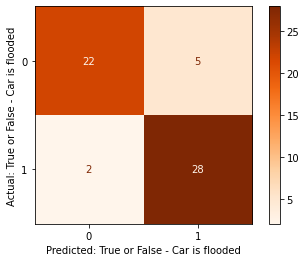

In [562]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Plot
plot_confusion_matrix(logreg, Z_test, y_test, cmap='Oranges', values_format='d');
plt.xlabel('Predicted: True or False - Car is flooded')
plt.ylabel('Actual: True or False - Car is flooded');

In [563]:
# FOR VERIFICATION AND INTERPRETABILITY OF ABOVE
print('False'.center(40, "-"))
print(f'(0,0) True Negative - {tn}')
print(f'(0,1) False Positive - {fp}')
print('True'.center(40, "-"))
print(f'(1,0) False Negative - {fn}')
print(f'(1,1) True Positive - {tp}')

-----------------False------------------
(0,0) True Negative - 22
(0,1) False Positive - 5
------------------True------------------
(1,0) False Negative - 2
(1,1) True Positive - 28


In [564]:
# Model Prediction
print(f'Model Predicted Score: {(tn + tp) / (tn + tp + fn + fp)}')
print()

# Calculate the specificity
spec = tn / (tn + fp)
print(f'Specificity: {spec} - (0) Correctly Predicted NO FLOODING / ALL NO FlOODING images')
print()

# Sensitivity
sens = tp / (tp + fn)
print(F'Sensitivity: {sens} - (1) Correctly Predicted FLOODING / ALL FlOODING images')
print()

# Precision
prec = tp / (tp + fp)
print(f'Precision: {prec} - (1) Correctly Predicted FLOODING / ALL FlOODING predictions')


Model Predicted Score: 0.8771929824561403

Specificity: 0.8148148148148148 - (0) Correctly Predicted NO FLOODING / ALL NO FlOODING images

Sensitivity: 0.9333333333333333 - (1) Correctly Predicted FLOODING / ALL FlOODING images

Precision: 0.8484848484848485 - (1) Correctly Predicted FLOODING / ALL FlOODING predictions


In [585]:
# Set Up Pipes
lr_pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('logreg', LogisticRegression(solver='liblinear', random_state=2020)),
])

mnb_pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('mnb', MultinomialNB()),
])
svc_pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('svc', LinearSVC(random_state=2020)),
])

In [588]:
# Set Up Params
lr_pipe.get_params()
lr_pipe_params = {
    'cv__max_df': [1.0],
    'cv__max_features': [None],
    'cv__min_df': [1],
    'cv__ngram_range': [(1, 1)],
    'logreg__C': [1.0],
    'logreg__class_weight': [None],
    'logreg__max_iter': [100],
#     'logreg__solver': ['lbfgs'],  
}

mnb_pipe.get_params()
mnb_pipe_params = {
    'cv__max_df': [1.0],
    'cv__max_features': [None],
    'cv__min_df': [1],
    'cv__ngram_range': [(1, 1)],
    'mnb__alpha': [1.0],
}

svc_pipe.get_params()
svc_pipe_params = {
    'cv__max_df': [1.0],
    'cv__max_features': [None],
    'cv__min_df': [1],
    'cv__ngram_range': [(1, 1)],
    'svc__C': [1.0],
    'svc__class_weight': [None],
}

In [591]:
# gridsearch
gs_lr = GridSearchCV(lr_pipe, lr_pipe_params, n_jobs = -1, cv = 5, verbose = 2)
gs_lr.fit(X_train, y_train)

gs_mnb = GridSearchCV(mnb_pipe, mnb_pipe_params, n_jobs = -1, cv = 5, verbose = 2)
gs_mnb.fit(X_train, y_train)

gs_svc = GridSearchCV(svc_pipe, svc_pipe_params, n_jobs = -1, cv = 5, verbose = 2)
gs_svc.fit(X_train, y_train)

In [599]:
# all_objects = []
# for i in df_all.objects:
#     all_objects.extend(i)
# # sorted(set(all_objects))

In [606]:
# all_labels = []
# for i in df_all.labels:
#     all_labels.extend(i)
# sorted(set(all_labels))

# OLDER ISH

In [239]:
# # Create alternate Dataframe from results

# flood_df = pd.DataFrame(
#     [(k, v) for (k, L) in flood_dict.items() for v in L], 
#     columns=['image_file_name', 'labels']
# )
# flood_df['flood_in_image'] = 'yes'

# flood_df['image_file_name'] = flood_df['flood_in_image'] + '_' + flood_df['image_file_name']
# flood_df.head()

In [240]:
# # Create alternate Dataframe from results

# no_flood_df = pd.DataFrame(
#     [(k, v) for (k, L) in no_flood_dict.items() for v in L], 
#     columns=['image_file_name', 'labels']
# )
# no_flood_df['flood_in_image'] = 'no'

# no_flood_df['image_file_name'] = no_flood_df['flood_in_image'] + '_' + no_flood_df['image_file_name']
# no_flood_df.head()

In [241]:
# # concatenate to make alternate df
# sample_df = pd.concat([flood_df, no_flood_df])
# sample_df

In [242]:
# # Groupby
# sample_df.groupby('labels')[['image_file_name']].count().sort_values(by='image_file_name', ascending=False)

In [243]:
# sorted(sample_df.labels.unique())

# # Words that may suggest flooding pulled from above and manually added to list
# flood_key_words = ['Geological phenomenon', 'Low water crossing', 'Mud', 'Precipitation', 'Rain', 'Rescue', 'River', 'Stream', 'Water', 'Water resources', 'Watercourse', 'Waterway',]

In [244]:
# modeling_df = sample_df
# modeling_df

In [245]:
# modeling_df['flood_in_image'] = [1 if i == 'yes' else 0 for i in modeling_df['flood_in_image']]
# modeling_df

In [246]:
# modeling_df = pd.get_dummies(modeling_df, columns=['labels'], drop_first=True)
# modeling_df

In [247]:
# modeling_df = modeling_df.groupby('image_file_name').sum()
# modeling_df.head()

In [248]:
# modeling_df['flood_in_image'] = [1 if i > 0 else 0 for i in modeling_df['flood_in_image']]

In [249]:
# modeling_df.shape

In [255]:
# # Baseline
# modeling_df.flood_in_image.value_counts(normalize=True)

In [256]:
# X = modeling_df.drop(columns=['flood_in_image'])
# y = modeling_df.flood_in_image

In [257]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2020)

In [258]:
# lr = LinearRegression()
# lr.fit(X_train, y_train)

In [259]:
# print(f'Training Score: {lr.score(X_train, y_train)}')
# print(f'Testing Score: {lr.score(X_test, y_test)}')

In [266]:
def localize_objects_tony(file_list, string__no_flood_OR_flood):
    
    file_dict = {}
    
    for file in file_list:
    
        client = vision.ImageAnnotatorClient(credentials=credentials)

        with open('./Vision-API/images/' + string__no_flood_OR_flood + '/' + file, 'rb') as image_file:
            content = image_file.read()
        image = vision.types.Image(content=content)

        objects = client.object_localization(image=image).localized_object_annotations
        
        print(file)
        print('Number of objects found: {}'.format(len(objects)))
        
        object_dict = {}
        
        for index, object_ in enumerate(objects):
            object_dict['object'+str(index+1)+'_name'] = object_.name
            object_dict['object'+str(index+1)+'_score'] = object_.score
            
        file_dict[string__no_flood_OR_flood+file] = object_dict
            
    return file_dict

In [300]:
# image_objects_flood = localize_objects_tony(flood_list, 'flood')

In [301]:
# image_objects_flood

In [302]:
# image_objects_no_flood = localize_objects_tony(no_flood_list, 'no_flood')

In [303]:
# image_objects_no_flood

In [311]:
# localize_flood_df = pd.DataFrame(image_objects_flood).T
# localize_flood_df.head()

In [312]:
# localize_no_flood_df = pd.DataFrame(image_objects_no_flood).T
# localize_no_flood_df.head()

In [313]:
# localize_df = pd.concat([localize_no_flood_df, localize_flood_df], axis=0).reset_index().rename(columns={'index' : 'filename'})
# localize_df

In [314]:
# noflfl_df.shape

In [315]:
# localize_df.shape

In [316]:
# localize_df = localize_df.sort_values(by='filename')
# localize_df = localize_df.reset_index().drop(columns='index')
# localize_df

### ALL FUNCTIONS BELOW TAKEN FROM GOOGLE

# COLOR / PROPERTIES detector

In [260]:
def detect_properties(path):
    """Detects image properties in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient(credentials=credentials)

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.types.Image(content=content)

    response = client.image_properties(image=image)
    props = response.image_properties_annotation
    print('Properties:')

    for color in props.dominant_colors.colors:
        print('fraction: {}'.format(color.pixel_fraction))
        print('\tr: {}'.format(color.color.red))
        print('\tg: {}'.format(color.color.green))
        print('\tb: {}'.format(color.color.blue))
        print('\ta: {}'.format(color.color.alpha))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [261]:
# detect_properties('./Vision-API/images/flood/BMW_528i.jpeg')

# LOGO detector

In [262]:
def detect_logos(path):
    """Detects logos in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient(credentials=credentials)

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.types.Image(content=content)

    response = client.logo_detection(image=image)
    logos = response.logo_annotations
    print('Logos:')

    for logo in logos:
        print(logo.description)

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [263]:
# detect_logos('./Vision-API/images/flood/BMW_528i.jpeg')

# LABEL detector

In [264]:
# def detect_labels(path):
#     """Detects labels in the file."""
#     from google.cloud import vision
#     import io
#     client = vision.ImageAnnotatorClient(credentials=credentials)

#     with io.open(path, 'rb') as image_file:
#         content = image_file.read()

#     image = vision.types.Image(content=content)

#     response = client.label_detection(image=image)
#     labels = response.label_annotations
#     print('Labels:')

#     for label in labels:
#         print(label.description)

#     if response.error.message:
#         raise Exception(
#             '{}\nFor more info on error messages, check: '
#             'https://cloud.google.com/apis/design/errors'.format(
#                 response.error.message))

# MULTIPLE OBJECT detector

In [601]:
def localize_objects(path):
    """Localize objects in the local image.

    Args:
    path: The path to the local file.
    """
    from google.cloud import vision
    client = vision.ImageAnnotatorClient(credentials=credentials)

    with open(path, 'rb') as image_file:
        content = image_file.read()
    image = vision.types.Image(content=content)

    objects = client.object_localization(image=image).localized_object_annotations

    print('Number of objects found: {}'.format(len(objects)))
    for object_ in objects:
        print('\n{} (confidence: {})'.format(object_.name, object_.score))
        print('Normalized bounding polygon vertices: ')
        for vertex in object_.bounding_poly.normalized_vertices:
            print(' - ({}, {})'.format(vertex.x, vertex.y))

In [604]:
localize_objects('./Vision-API/images/flood/10.jpg')

Number of objects found: 2

Car (confidence: 0.764551043510437)
Normalized bounding polygon vertices: 
 - (0.1633434146642685, 0.21115052700042725)
 - (0.7493024468421936, 0.21115052700042725)
 - (0.7493024468421936, 0.47750839591026306)
 - (0.1633434146642685, 0.47750839591026306)

House (confidence: 0.5149136781692505)
Normalized bounding polygon vertices: 
 - (0.014508839696645737, 0.005823606159538031)
 - (0.5434554815292358, 0.005823606159538031)
 - (0.5434554815292358, 0.26785704493522644)
 - (0.014508839696645737, 0.26785704493522644)
